# Project: Medical Appointment No Show Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I explore a dataset containing information of 100,000 medical appointments in Brazil and is focused on the question of whether or not patients show up for their doctors appointment. A number of characteristics about each patient included in each column is described below


1. `PatientId`: Identification Number of each patient
2. `AppointmentID`: Identification Number of each appointment
3. `Gender`: The gender of the patients
4. `ScheduledDay`: Details on when the patient set up the appointment
5. `AppointmentDay`: Details on when the appointment was meant to hold
6. `Age`: The age of the patients
7. `Neighbourhood`: The location of the hospital
8. `Scholarship`: Binary variable indicating whether or not the patient is enrolled in the Brasilian welfare program [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)
9. `Hipertension`: Binary variable indicating whether or not the patient is hypertensive
10. `Diabetes`: Binary variable indicating whether or not the patient is diabetic
11. `Alcoholism`: Binary variable indicating whether or not the patient is alcoholic by certain unknown standards
12. `Handcap`: Variable indicating whether or not the patient is handicapped or the number of handicap categories they belong to. Check out more from a discussion with the creator of the dataset [here]( https://www.kaggle.com/joniarroba/noshowappointments/discussion/29699)
13. `SMS_received`: Indicating whether 1 or more reminder text messages were sent to the patient
14. `No-Show`: `Yes` if the patient missed their appointment and `No` if the patient showed up to their appointment 

In [1]:
#import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

Here, I load the data, clean and trim the dataset to improve its usability for analysis. I start by loading the dataset and checking for general properties. 

In [2]:
# loading the dataset as a pandas dataframe and displaying the first five rows
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# displaying the shape of the dataset
df.shape

(110527, 14)

The dataset has 110,527 rows and 14 columns.

In [4]:
# displaying general dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Out of the 14 columns, 1 represents a float variable, 8 are integers and the rest are *strings*.

In [5]:
# displaying the number of empty cells per column
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

No cell in the entire dataset has a null value.

In [6]:
# displaying summary statistics of numerical variables in the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning

From the summary statistics above, the minimum age is -1. This was probably a human error during data gathering. I display the patient corresponding to this age and drop the row.

In [7]:
# displaying the rows with age -1
df[df["Age"] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [8]:
# dropping the row corresponding to the negative age
df.drop(df.index[99832], inplace = True)

In [9]:
# resetting the row indices after dropping a row
df = df.reset_index(drop=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110526 entries, 0 to 110525
Data columns (total 14 columns):
PatientId         110526 non-null float64
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null object
AppointmentDay    110526 non-null object
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [11]:
# displaying summary statistics of new dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We see that the minimum age of patients is now 0. It is either there were human errors again or the age of babies that are less than a year old was denoted by 0. If it were a human error, I could drop these rows, otherwise I retain them. I hypothesize that  these patients are babies that are less than a year old. However, I perform some assessments to reasonably prove or disprove my hypothesis.

In [12]:
# displaying the rows with age 0
zero_age = df[df["Age"] == 0]
zero_age.shape

(3539, 14)

There are 3539 patients with age 0. It is very unlikely that there was a human error in this case. However, I perform further assessment of these patients for any other findings. Ideally, I do not expect a baby to drink alcohol. Perhaps, if some of these patients drink alcohol, then there's a chance the zero age can be attributed to human errors.

In [13]:
# displaying the patients that drink alcohol
zero_age[zero_age["Alcoholism"] == 1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


Unsurprisingly, none of these patients drink alcohol. I proceed with my assessments by checking for hypertension and diabetes among them

In [14]:
# displaying the patients that are hypertensive
zero_age[zero_age["Hipertension"] == 1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [15]:
# displaying the patients that are diabetic
zero_age[zero_age["Diabetes"] == 1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


Again, none of the patients are either hypertensive or diabetic. I check if any of these patients are handicapped.

In [16]:
# displaying the patients that have at least one major disability
zero_age[zero_age["Handcap"] >= 1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
98247,3.647246e+14,5788682,F,2016-06-08T13:18:12Z,2016-06-08T00:00:00Z,0,JABOUR,0,0,0,0,1,0,No


One patient has one disability. This seems reasonable. A baby can be congenitally born blind or have any other obvious physical disability. There is no other variable that can give some insight into proving or disproving my hypothesis. Therefore, I go ahead to accept my hypothesis and conclude that these patients are babies. Next I show the summary statistics again in search of any obvious flaws.

In [17]:
# displaying summary statistics of new dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The maximum age in the dataset is 115. This seems possible. However, as a measure of validation, I need to know how many patients are 100 years and above. Ideally, I expect this number to be few

In [18]:
# displaying the patients that are 100 years and above
over_hundred = df[df["Age"] >= 100]
over_hundred.shape

(11, 14)

It seems reasonable that 11 out of over 110,000 patients are 100 and above. From the summary statistics, the mean age of the patients is about 37 years and 9.8% of them are enrolled in Bolsa Familia. About 19.7% of the patients are hypertensive, 7.18% are diabetic, 3% are alcoholics and 2.2% are handicapped. 32.1% of the patients received at least 1 reminder text messsage.

In [19]:
# displaying the number of duplicate rows 
df.duplicated().sum()

0

There are also no duplicate rows in the dataset.

Certain columns are unnecessary in determining the outcome of the response variable. For example, the `PatientID` and `AppointmentID` is particular to the patient and in no way gives us any useful information about why they could have missed their appointment. Therfore, I go ahead and drop these columns

In [20]:
#dropping irrelevant columns
df.drop(["PatientId",  "AppointmentID"], axis = 1, inplace = True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Just for the sake of consistency and readability, I rename the columns by making them all lower case, fixing all typographical errors and using `_` as a separator.

In [21]:
# creating new column labels
new_columns = ["gender", "scheduled_day", "appointment_day", "age", "neighbourhood", "scholarship", "hypertension", "diabetes", "alcoholism", "handicap", "sms_received", "no_show"]
df.columns = new_columns
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The `scheduled_day` and `appointment_day` are meant to be `datetime` objects since they represent when the appointments were scheduled and the actual appointment days respectively. However, these variables are object - strings. I have to fix this to be able to carry out any computations, if need be, on these variables.

In [22]:
# converting to datetime datatype
df["scheduled_day"] = pd.to_datetime(df["scheduled_day"])
df["appointment_day"] = pd.to_datetime(df["appointment_day"])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110526 entries, 0 to 110525
Data columns (total 12 columns):
gender             110526 non-null object
scheduled_day      110526 non-null datetime64[ns, UTC]
appointment_day    110526 non-null datetime64[ns, UTC]
age                110526 non-null int64
neighbourhood      110526 non-null object
scholarship        110526 non-null int64
hypertension       110526 non-null int64
diabetes           110526 non-null int64
alcoholism         110526 non-null int64
handicap           110526 non-null int64
sms_received       110526 non-null int64
no_show            110526 non-null object
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usage: 10.1+ MB


For the most of it, I think the dataset is clean and tidy enough for exploratory data analysis.

<a id='eda'></a>
## Exploratory Data Analysis

I ask certain research questions about which variables could potentially have affected whether or not patients in the dataset showed up for their appointments. 

#### What factors are important for us to be able to understand why a patient showed up or missed their scheduled appointment? 
* The lead time - time between scheduling appointments and actual appointment day
* The state of health of the patient -  Are they hypertensive? Do they have issues with alcohol usage? Are they diabetic? Are they handicapped? If yes, how many handicap categories do they belong to? 
* Did they receive at least one remainder text message before the actual date of the appointment?
* The age of the patients
* Perhaps their gender


I start by asking - Could the length of period between when the appointment is scheduled and when the actual appointment holds be a major determinant of whether patients show up for their appointments?

I create a column representing this duration for all patients and I call it `lead_time`.

In [24]:
# creating lead_time column
df["lead_time"] = df["appointment_day"] - df["scheduled_day"]
df.head(5)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,lead_time
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1 days +05:21:52
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1 days +07:51:33
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1 days +07:40:56
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1 days +06:30:29
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1 days +07:52:37


Intuitively, I am more concerned about lead times that are at least one day long. I doubt any hospital would make an appointment for the same day it was scheduled. I acknowledge that my assumption is not absolute.

In [25]:
df['lead_time'] = df['lead_time'].apply(lambda x: x.days)

In [26]:
df['lead_time'].describe()

count    110526.000000
mean          9.183794
std          15.255034
min          -7.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: lead_time, dtype: float64

From here, we see that some lead times are *negative*. I assume that these entries are either as a result of combined datasets (I presume this dataset was curated) or human error. I proceed to drop them.

In [27]:
# dropping negative lead times
df.drop(df[df.lead_time <= -1].index, inplace=True)

I will not be needing the `appointment_day` and `scheduled_day` columns in this analysis anymore. So, I go ahead to drop them also.

In [28]:
# dropping more irrelevant columns
df.drop(["appointment_day",  "scheduled_day"], axis = 1, inplace = True)
df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,lead_time
5,F,76,REPÚBLICA,0,1,0,0,0,0,No,1
6,F,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1
7,F,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1
9,F,19,CONQUISTA,0,0,0,0,0,0,No,1
10,F,30,NOVA PALESTINA,0,0,0,0,0,0,No,1


It might be interesting to explore how the length of waiting time before appointment affected either attending or missing the appointment. I split the priginal dataset into two groups - those who showed up and those who did not show up.

In [29]:
showed_up = df[df["no_show"] == "No"]
no_show_up = df[df["no_show"] == "Yes"]

In [30]:
wait_no_show = no_show_up.groupby("lead_time").no_show.value_counts()
wait_no_show.head()

lead_time  no_show
0          Yes        1113
1          Yes        1602
2          Yes         644
3          Yes        1231
4          Yes         872
Name: no_show, dtype: int64

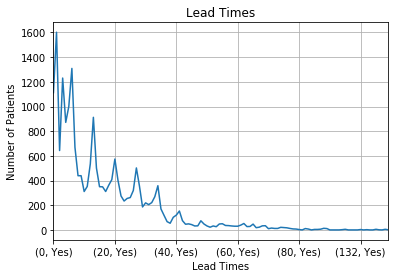

In [31]:
ax = wait_no_show.plot(title = "Lead Times", grid = True);
ax.set_xlabel("Lead Times")
ax.set_ylabel("Number of Patients");

The number of patients that missed the appointments dropped as the length of the lead times increased. Then again, the total number of patients assigned per each lead time category might be another confounding factor that attributed to this finding.

Next, I explore all continuous and categorical variables in the dataset for any general patterns.

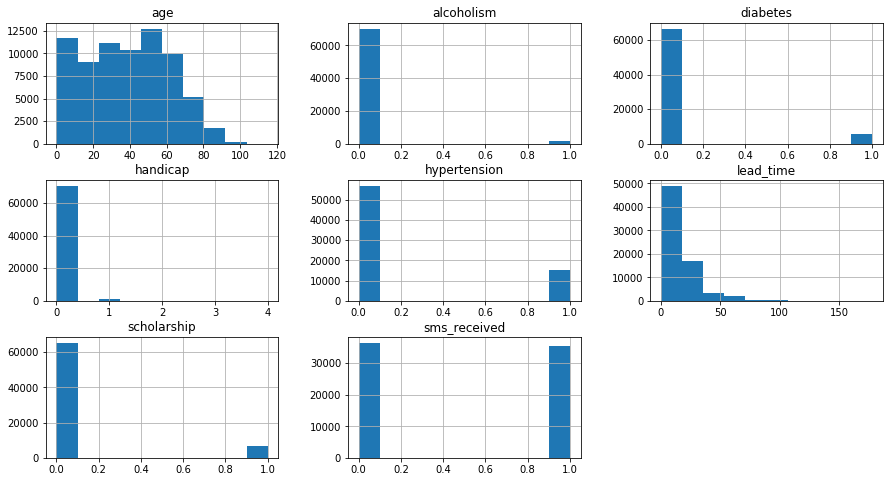

In [32]:
df.hist(figsize=(15, 8));

I then explore the age variable and try to find any interesting pattern that could have affected whether or not patients showed up for their appointments.

In [33]:
df["no_show"].replace("n", "N").replace("y", "Y");

In [34]:
per_show = (len(showed_up)/len(df)) * 100;
print("The mean age of patients who showed up is about","{:.2f} years".format(showed_up.age.mean()), "and patients who showed up represent about","{:.2f}%".format(per_show), "of all patients")

The mean age of patients who showed up is about 39.97 years and patients who showed up represent about 71.48% of all patients


In [35]:
per_no_show = (len(no_show_up)/len(df)) * 100;
print("The mean age of patients who did not show up is about","{:.2f} years".format(no_show_up.age.mean()), "and patients who did not show up represent about","{:.2f}%".format(per_no_show), "of all patients")

The mean age of patients who did not show up is about 34.84 years and patients who did not show up represent about 28.52% of all patients


From the dataset, more people showed up than did not show up. However, the proportion of patients who didn't show up is reasonably high and calls for concern. I make an attempt to explore the dataset to try and find patterns among the patients that might have attributed to whether or not they showed up.  I start by looking at the distribution of age across patients that showed up and did not show up for their appointments.

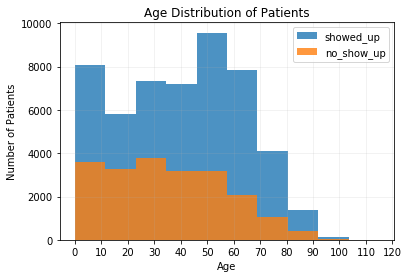

In [36]:
# plotting a histogram for the age distribution of patients
plt.hist(showed_up.age, alpha = 0.8)
plt.hist(no_show_up.age, alpha = 0.8);
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.title("Age Distribution of Patients")
legend = ["showed_up", "no_show_up"]
plt.legend(legend)
plt.xticks(range(0, 130, 10))
plt.grid(alpha = 0.2);

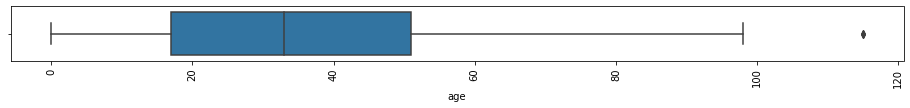

In [37]:
plt.figure(figsize=(16,1))
plt.xticks(rotation=90)
_ = sns.boxplot(x=no_show_up.age)

From the box plot above,most of the patients who missed their appointments are about 18 - 50 years old

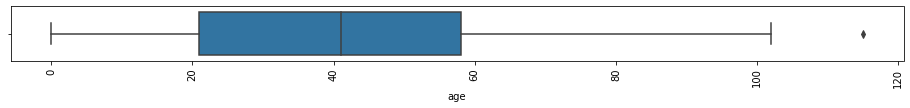

In [38]:
plt.figure(figsize=(16,1))
plt.xticks(rotation=90)
_ = sns.boxplot(x=showed_up.age)

From the box plot above,most of the patients who showed up for their appointments are about 20 - 58 years old.

I conclude that the age of the patients was not a contributing factor to whether or not they missed their appointments

Next, I try to find a relationship between being hypertensive and showing up for appointment.

In [39]:
# patients who are hypertensive in the dataset
hypertensive_patients = df[df["hypertension"] == 1]

# calculating the percentage of hypertensive people that showed up for their appointments
show_up_hyper_per = (len(showed_up[showed_up["hypertension"] == 1])/len(hypertensive_patients))*100
print("The percentage of hypertensive patients who showed up is","{:.2f}%".format(show_up_hyper_per))

The percentage of hypertensive patients who showed up is 76.48%


In [40]:
# calculating the percentage of hypertensive people who missed their appointments
no_show_hyper_per = (len(no_show_up[no_show_up["hypertension"] == 1])/len(hypertensive_patients))*100
print("The percentage of hypertensive patients who did not up is","{:.2f}%".format(no_show_hyper_per))

The percentage of hypertensive patients who did not up is 23.52%


Next, I show this visually. Conclusively, patients without hypertension were almost five times more likely to miss their appointments than patients with hypertension.

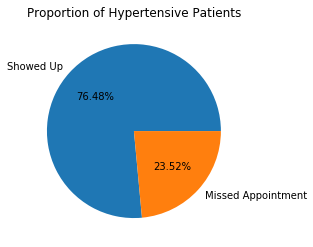

In [41]:
a = [show_up_hyper_per, no_show_hyper_per];
plt.pie(a, labels = ["Showed Up", "Missed Appointment"], autopct='%1.2f%%');
plt.title("Proportion of Hypertensive Patients");

Next, I try to find a relationship between being diabetic and showing up for appointment.

In [42]:
# patients who are diabetic in the dataset
diabetic_patients = df[df["diabetes"] == 1]

# calculating the percentage of diabetic people that showed up for their appointments
show_up_diabetes_per = (len(showed_up[showed_up["diabetes"] == 1])/len(diabetic_patients))*100
print("The percentage of diabetic patients who showed up is","{:.2f}%".format(show_up_diabetes_per))

The percentage of diabetic patients who showed up is 75.04%


In [43]:
# calculating the percentage of diabetic people who missed their appointments
no_show_up_diabetes_per = (len(no_show_up[no_show_up["diabetes"] == 1])/len(diabetic_patients))*100
print("The percentage of diabetic patients who did not show up is","{:.2f}%".format(no_show_up_diabetes_per))

The percentage of diabetic patients who did not show up is 24.96%


Next, I show this visually. Conclusively, patients without diabetes were over four times more likely to miss their appointments than patients with diabetes.

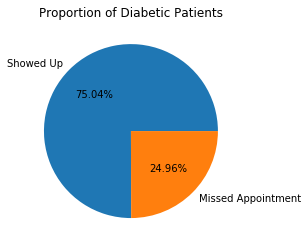

In [44]:
a = [show_up_diabetes_per, no_show_up_diabetes_per];
plt.pie(a, labels = ["Showed Up", "Missed Appointment"], autopct='%1.2f%%');
plt.title("Proportion of Diabetic Patients");

Next, I try to find a relationship between being an alcoholic and showing up for appointment.

In [45]:
# patients who are alcoholics in the dataset
alcoholic_patients = df[df["alcoholism"] == 1]

# calculating the percentage of alcoholic people that showed up for their appointments
show_up_alcoholic_per = (len(showed_up[showed_up["alcoholism"] == 1])/len(alcoholic_patients))*100
print("The percentage of alcoholic patients who showed up is","{:.2f}%".format(show_up_alcoholic_per))

The percentage of alcoholic patients who showed up is 65.92%


In [46]:
# calculating the percentage of alcoholic people who missed their appointments
no_show_up_alcoholic_per = (len(no_show_up[no_show_up["alcoholism"] == 1])/len(alcoholic_patients))*100
print("The percentage of alcoholic patients who did not show up is","{:.2f}%".format(no_show_up_alcoholic_per))

The percentage of alcoholic patients who did not show up is 34.08%


Next, I show this visually. Conclusively, non alcholic patients were almost four times more likely to miss their appointments than alcoholic patients. This is logical as alcoholic patients are at risk of a number of diseases affecting in vital organs like the liver, kidney, pancreas etc.

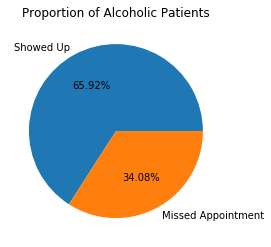

In [47]:
a = [show_up_alcoholic_per, no_show_up_alcoholic_per];
plt.pie(a, labels = ["Showed Up", "Missed Appointment"], autopct='%1.2f%%');
plt.title("Proportion of Alcoholic Patients");

Next, I try to find a relationship between being handicapped and showing up for appointment.

In [48]:
# patients who have at least one type of disability in the dataset
handicapped_patients = df[df["handicap"] >= 1]

# calculating the percentage of alcoholic people that showed up for their appointments
show_up_handicap_per = (len(showed_up[showed_up["handicap"] >= 1])/len(handicapped_patients))*100
print("The percentage of handicapped patients who showed up is","{:.2f}%".format(show_up_handicap_per))

The percentage of handicapped patients who showed up is 74.45%


In [49]:
# calculating the percentage of handicapped people who missed their appointments
no_show_up_handicap_per = (len(no_show_up[no_show_up["handicap"] >= 1])/len(handicapped_patients))*100
print("The percentage of handicapped patients who did not show up is","{:.2f}%".format(no_show_up_handicap_per))

The percentage of handicapped patients who did not show up is 25.55%


Next, I show this visually. Conclusively, patients without any disabilities were over four times more likely to miss their appointments than patients with at least one disability.

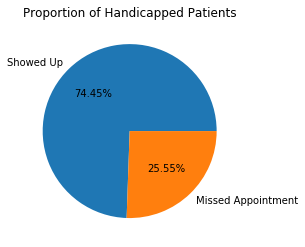

In [50]:
a = [show_up_handicap_per, no_show_up_handicap_per];
plt.pie(a, labels = ["Showed Up", "Missed Appointment"], autopct='%1.2f%%');
plt.title("Proportion of Handicapped Patients");

Next, I try to find out if receiving SMS reminders affects whether or not patients show up for their appointments.

In [51]:
# showing the distribution by whether or not an SMS was received
a = df.groupby("sms_received").no_show.value_counts()
b =pd.DataFrame(a)
b.columns = ["number"]
total = sum(b["number"])
b["proportion"] = b["number"][0:]/total
b["proportion"]

sms_received  no_show
0             No         0.357690
              Yes        0.149224
1             No         0.357120
              Yes        0.135966
Name: proportion, dtype: float64

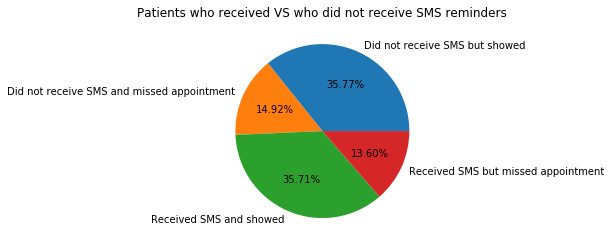

In [52]:
a = ["Did not receive SMS but showed", "Did not receive SMS and missed appointment", "Received SMS and showed", "Received SMS but missed appointment"];
plt.pie(b["proportion"], labels = a, autopct='%1.2f%%');
plt.title("Patients who received VS who did not receive SMS reminders");

Ideally, one would expect that receiving an SMS reminder prior to the appointment would improve the chances of the person showing up. However, the reverse is the case here. Over 56% of the patients showed up for their appointments even though they did not receive an SMS reminder. I conclude that receiving an SMS reminder text does not affect whether or not patients show up for their appointments

Next, I try to find any relationship between the gender of the patients and whether or not they show up for their appointments.

In [53]:
# displaying the number of males and females who missed their appointments
df.groupby("gender").no_show.value_counts()

gender  no_show
F       No         34396
        Yes        13674
M       No         17041
        Yes         6848
Name: no_show, dtype: int64

Next, I show this visually with a bar graph.

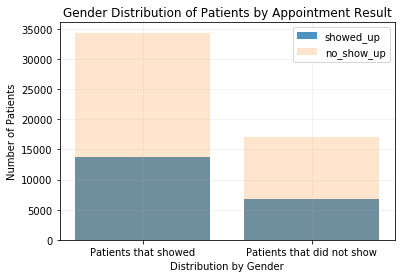

In [54]:
# plotting a bar graph for the gender distribution of patients
x_axis = ["Patients that showed", "Patients that did not show"]
plt.bar(x_axis, no_show_up.groupby("gender").no_show.value_counts(), alpha = 0.8)
plt.bar(x_axis, showed_up.groupby("gender").no_show.value_counts(), alpha = 0.2);
plt.xlabel("Distribution by Gender")
plt.ylabel("Number of Patients")
plt.title("Gender Distribution of Patients by Appointment Result")
plt.legend(legend)
plt.grid(alpha = 0.2);

From the plot above, one might be tempted to think that Females are twice as likely to miss their appointments than Males. But there might be other confounding factors that could have contributed to this finding. Let's see the gender distribution among patients in the dataset - irrespective of whether or not they missed their appointments.

In [55]:
# gender distribution of patients
df.gender.value_counts()

F    48070
M    23889
Name: gender, dtype: int64

There are almost twice as more females than there are males. Little wonder, the bar chart above shows that more females miss appointments than males. I try to coterminate this by finding proportions across groups.

In [56]:
total_male = df[df["gender"] == "M"]
total_female = df[df["gender"] == "F"]
missed_male = no_show_up[no_show_up["gender"] == "M"]
missed_female = no_show_up[no_show_up["gender"] == "F"]

prop_missed_male = len(missed_male)/len(total_male)
prop_missed_female = len(missed_female)/len(total_female)

print("The proportion of Males in the dataset that missed their appointment is","{:.4f}".format(prop_missed_male))
print("The proportion of Females in the dataset that missed their appointment is","{:.4f}".format(prop_missed_female))


The proportion of Males in the dataset that missed their appointment is 0.2867
The proportion of Females in the dataset that missed their appointment is 0.2845


Here, we see that Females are as likely to miss their appointments as Males - about 20% of both Males and Females miss their appointments. I conclude that gender did not have any effect on whether or not patients missed their appointments. 

The appointments take place in 81 hospitals in Brazil. We might be able to find a pattern of large numbers of no shows being particular to one or some hospitals. It might be interesting to find out the location of the top 10 hospitals that have the most cases of missed appointments. 

In [57]:
print("The hospitals in the dataset are spread across", format(df.neighbourhood.nunique()), "locations")
print("\n")
print("These are the hospital locations with the most amount of misssed appointments")
top_hospital_missed = no_show_up.neighbourhood.value_counts().head(10)
top_hospital_missed

The hospitals in the dataset are spread across 80 locations


These are the hospital locations with the most amount of misssed appointments


JARDIM CAMBURI       1359
MARIA ORTIZ          1138
ITARARÉ               869
RESISTÊNCIA           857
JESUS DE NAZARETH     658
CENTRO                653
JARDIM DA PENHA       597
CARATOÍRA             541
TABUAZEIRO            526
BONFIM                513
Name: neighbourhood, dtype: int64

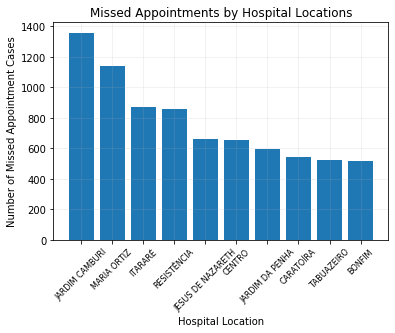

In [58]:
label = list(top_hospital_missed.index)
plt.bar(label, top_hospital_missed)
plt.xticks(fontsize = 8, rotation = 45)
plt.xlabel("Hospital Location")
plt.ylabel("Number of Missed Appointment Cases")
plt.title("Missed Appointments by Hospital Locations")
plt.grid(alpha = 0.2)

We can see that the hospitals are spread across different locations. It might be worthwhile to study `JARDIM CAMBURI` and `MARIA ORTIZ` as these locations have more than a thousand cases of people missing their hospital appointments.

<a id='conclusions'></a>
## Conclusions

I explored this dataset to try and find what variables could have attributed to patients missing their appointments. Conclusively, based on the information available in the dataset, I discovered the following:

**Factors that affected patients showing up for their appointments are:**
1. Whether or not the patient is hypertensive
2. Whether or not the patient is diabetic
3. Whether or not the patient is handicapped
4. Whether or not the patient is hypertensive

**Factors that had no effect on patients showing up for their appointments are:**
1. Their Gender
2. Their Age
3. Whether or not they received at least one SMS reminder


In [59]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295